Realizamos uma primeira análise exploratória para conhecer melhor o dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Importamos ambos o arquivo CSV de treinamento em um DataFrame.

In [2]:
train_csv = pd.read_csv('train.csv')
train_csv

image_id  healthy  multiple_diseases  rust  scab
0        Train_0        0                  0     0     1
1        Train_1        0                  1     0     0
2        Train_2        1                  0     0     0
3        Train_3        0                  0     1     0
4        Train_4        1                  0     0     0
...          ...      ...                ...   ...   ...
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

[1821 rows x 5 columns]

Para facilitar, vamos considerar que a coluna image_id é o nosso index, uma vez que todas as imagens são independentes e únicas.

In [3]:
train_csv = pd.read_csv('train.csv', index_col='image_id')
train_csv

healthy  multiple_diseases  rust  scab
image_id                                          
Train_0           0                  0     0     1
Train_1           0                  1     0     0
Train_2           1                  0     0     0
Train_3           0                  0     1     0
Train_4           1                  0     0     0
...             ...                ...   ...   ...
Train_1816        0                  0     0     1
Train_1817        1                  0     0     0
Train_1818        1                  0     0     0
Train_1819        0                  0     1     0
Train_1820        0                  0     0     1

[1821 rows x 4 columns]

Vamos utilizar a biblioteca PIL para dar uma olhada visual nas plantas. Utilizaremos as bibliotecas os, glob para nos permitir acessar os dados nas pastas.

In [11]:
import PIL.Image as Image
import os
import glob
import numpy as np

Vamos observar alguns exemplos simples e colocar sua respectiva label logo abaixo.

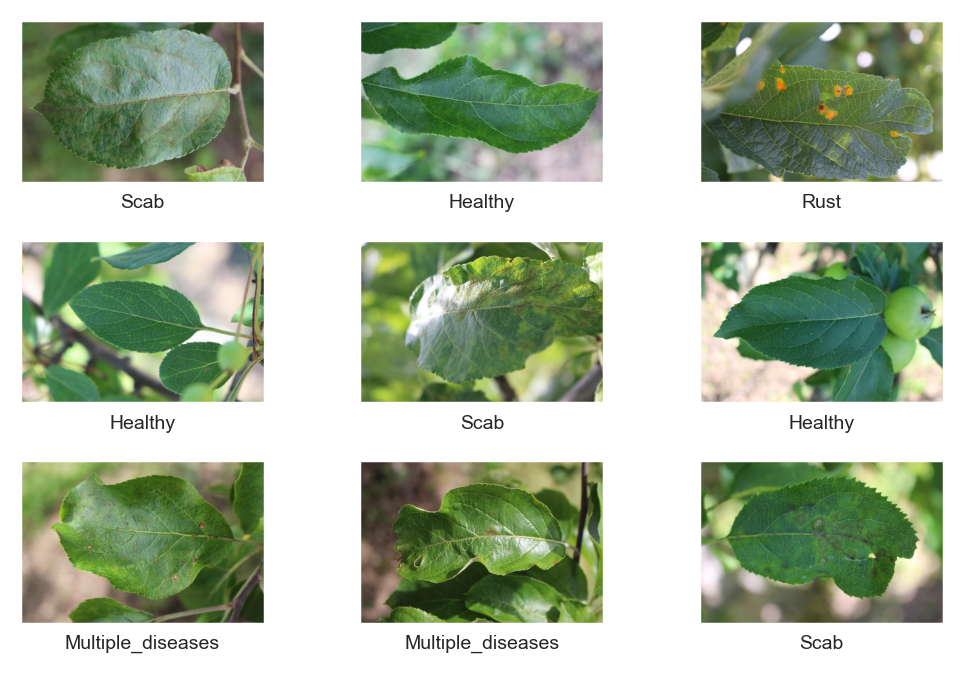

In [302]:
folder_path = './images/'
ext = '.jpg'

def plot_this_files(files, dpi=200):
    fig, ax = plt.subplots(nrows=3, ncols=3, dpi=dpi)
    plt.subplots_adjust(wspace=0.35, hspace=0.35)

    i = 0; j = 0
    for image_name in files:
        img = Image.open(folder_path + image_name + ext)
        if i % 3 == 0 and i != 0:
            i = 0
            j += 1
        ax[j][i].imshow(img)
        ax[j][i].grid(False)
        ax[j][i].set_xticks([])
        ax[j][i].set_xlabel(train_csv.loc[image_name][train_csv.loc[image_name] == 1].index[0].capitalize(), 
                            fontsize=7)
        ax[j][i].set_yticks([])
        i+=1

    plt.show()

random_indexes = np.random.choice(train_csv.shape[0], size=9, replace=False)
random_files = train_csv.index[random_indexes]
plot_this_files(random_files)

Algumas doenças são mais evidentes que outras mas ainda assim não é algo tão trivial de se observar.

### Informações gerais

Nesta seção vamos observar o arquivo de treinamento e ver quantas plantas estão doentes e quantas estão saudáveis.

28.34% das folhas estão saudáveis.


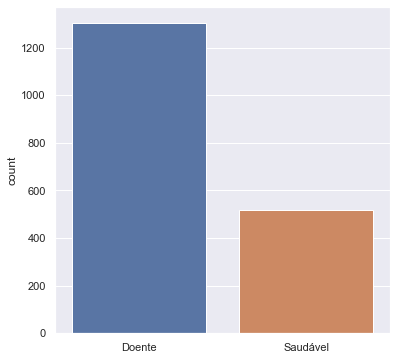

In [132]:
plt.figure(figsize=(6,6))
sns.countplot(x=train_csv['healthy'].map({1: "Saudável", 0: "Doente"}))
plt.xlabel('')
print("{:.2f}% das folhas estão saudáveis.".format(train_csv['healthy'].sum()/train_csv.shape[0] * 100))

Dúvida: é possível estar com mais de uma doença ao mesmo tempo?

In [142]:
train_csv[train_csv.sum(axis=1) > 1]

Empty DataFrame
Columns: [healthy, multiple_diseases, rust, scab]
Index: []

Não existe nenhuma linha com mais de um único número 1 inserido. Logo, a planta só apresenta 1 das condições.

Vamos checar como é a distribuição dos diferentes tipos de doença por folha.

In [261]:
sick = train_csv.iloc[:, 1:][train_csv.iloc[:, 1:].sum(axis = 1) != 0]

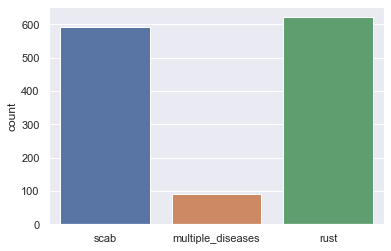

In [263]:
sns.countplot(x=sick.idxmax(axis=1))
plt.show()

In [286]:
(sick.describe().loc['mean']*100).apply(lambda x: str(round(x,2)) + '%').to_frame().rename({'mean': 'quantidade'}, axis=1)

quantidade
multiple_diseases      6.97%
rust                  47.66%
scab                  45.36%

Na média, apenas 6% das folhas apresentam múltiplas doenças. As doenças do tipo `rust` e `scab` estão equilibradas. Vamos observar mais algumas folhas de cada grupo.

In [292]:
healthy = train_csv[train_csv['healthy'] == 1]
rust = train_csv[train_csv['rust'] == 1]
scab = train_csv[train_csv['scab'] == 1]
multiple_diseases = train_csv[train_csv['multiple_diseases'] == 1]

### Saudável

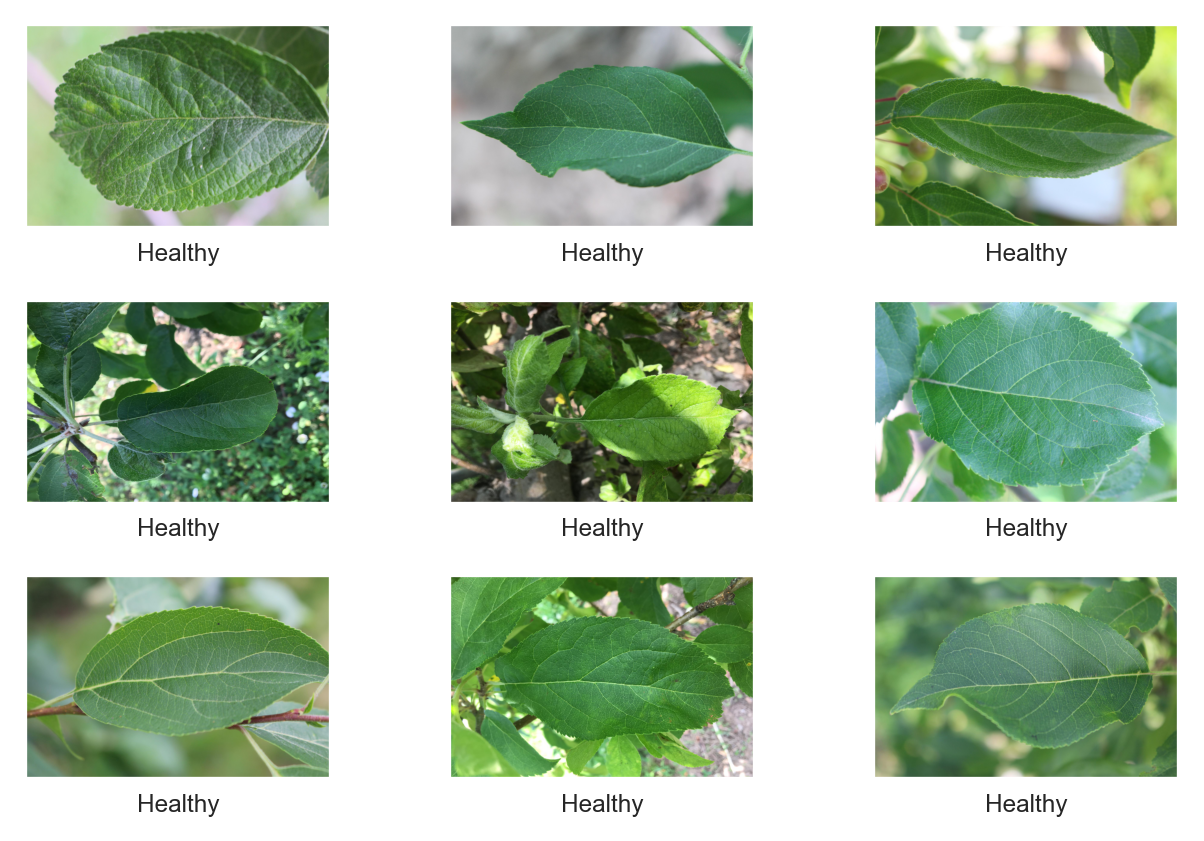

In [303]:
random_indexes = np.random.choice(healthy.shape[0], size=9, replace=False)
random_files = healthy.index[random_indexes]
plot_this_files(random_files, dpi=250)

Parecem se caracterizar por folhas sem quaisquer "marcas" em suas folhas. Predominantemente verdes em toda a sua extensão e verde-claras no que parece ser essa região de veias.

### Rust

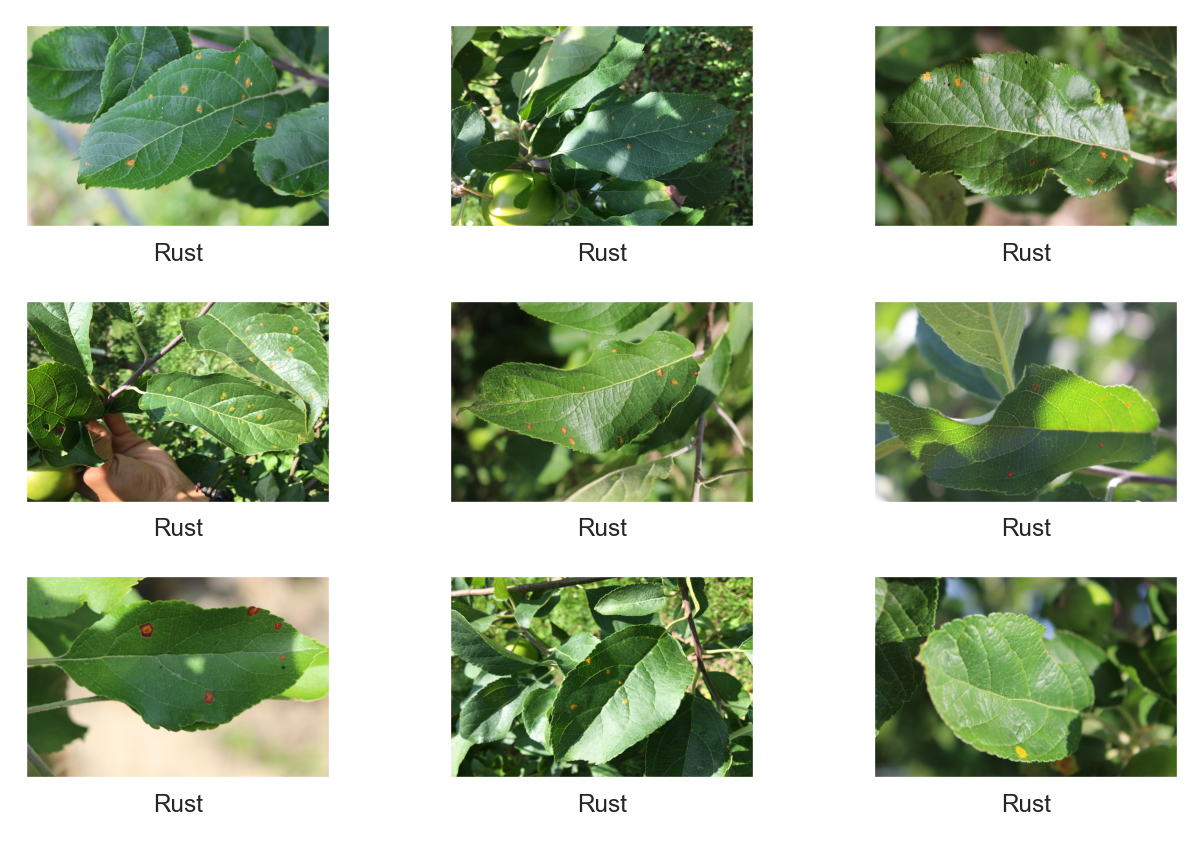

In [304]:
random_indexes = np.random.choice(rust.shape[0], size=9, replace=False)
random_files = rust.index[random_indexes]
plot_this_files(random_files, dpi=250)

Parecem se caracterizar por folhas com pontos, regiões circulares com coloração completamente amarela ou coloração amarela no centro e vermelha nas extremidades. Esses pontos aparentam não crescerem muito mais que poucos milímetros.

### Scab

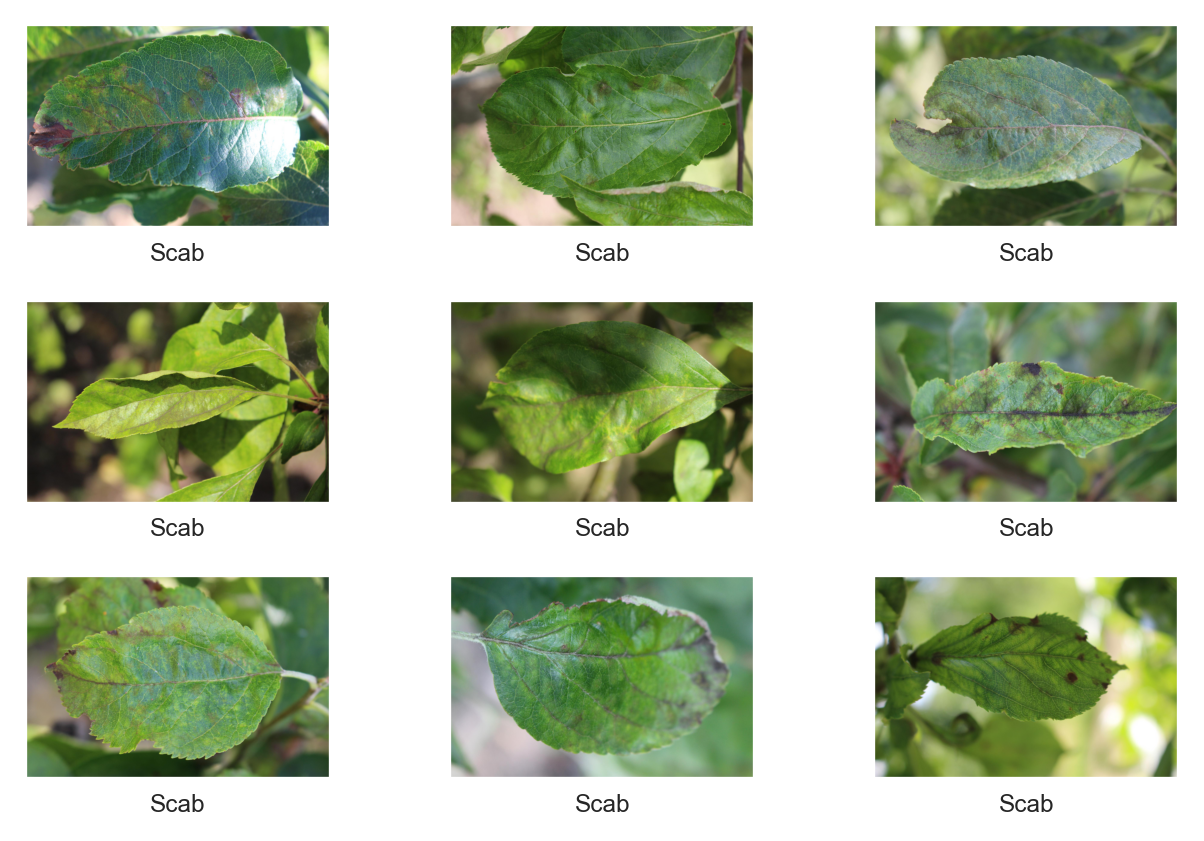

In [305]:
random_indexes = np.random.choice(scab.shape[0], size=9, replace=False)
random_files = scab.index[random_indexes]
plot_this_files(random_files, dpi=250)

As folhas nessa situação parecem estar sofrendo por alguma descoloração para o escuro ou verde desbotado. Essa descoloração parece afetar regiões bem maiores da folha, assim como suas veias.

### Multiple Diseases

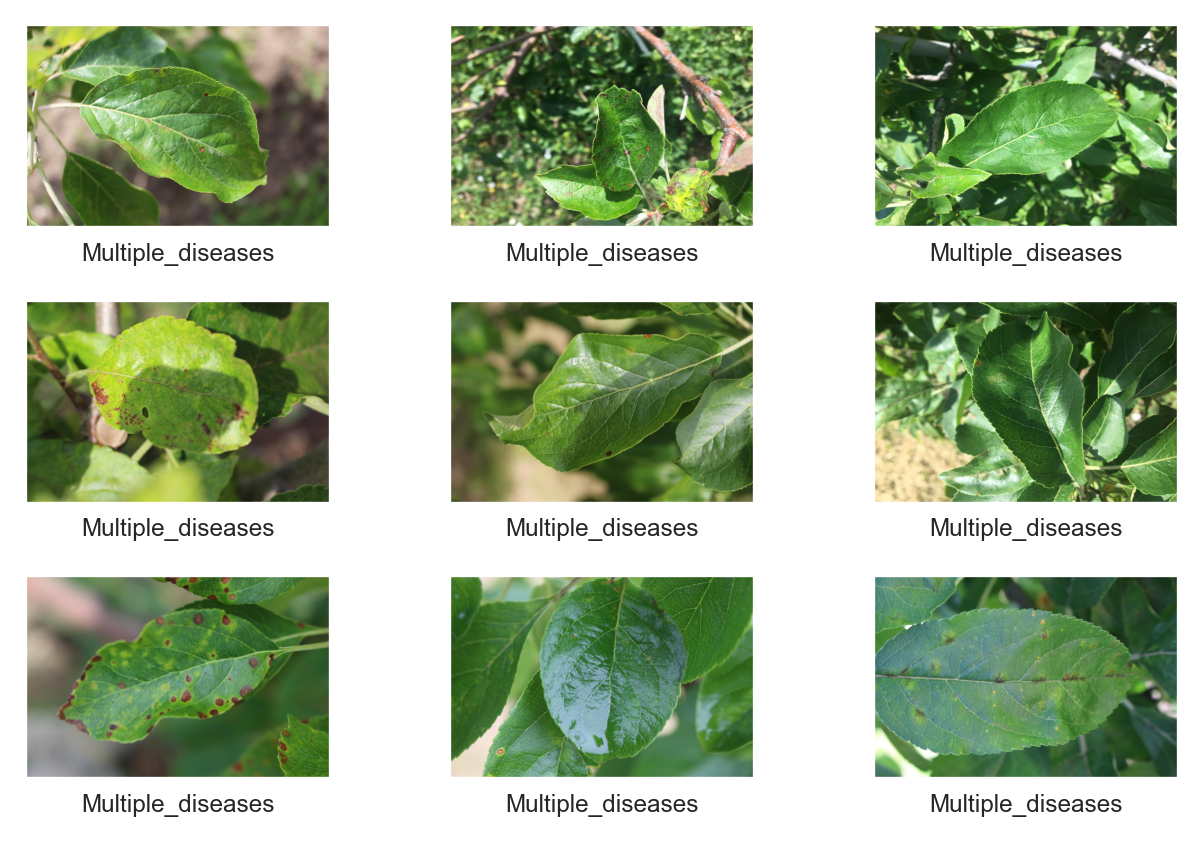

In [306]:
random_indexes = np.random.choice(multiple_diseases.shape[0], size=9, replace=False)
random_files = multiple_diseases.index[random_indexes]
plot_this_files(random_files, dpi=250)

Bem sutis nesse caso. Em alguns casos, os efeitos parecem similares ao efeito de `Rust`, porém eu diria que a coloração aqui tende a ser mais uniformemente escura, em alguns tons vermelhos quando é o caso. Em alguns casos dá pra observar tanto o `Rust` quando o `Scab`, o que faz sentido. Em alguns casos, é quase imperceptível.

### Concluído

Com isso, temos uma boa noção agora do dataset e de como ele está estruturado.